<a href="https://colab.research.google.com/github/Ramiro-R2D2/Consulta-de-dados-console/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
def priceSum(array_price):
  price_tot = 0
  for price in array_price:
    price_tot += price
  return price_tot

price_sum = priceSum(loja["Preço"])
price_sum2 = priceSum(loja2["Preço"])
price_sum3 = priceSum(loja3["Preço"])
price_sum4 = priceSum(loja4["Preço"])
price_array = [price_sum, price_sum2, price_sum3, price_sum4]

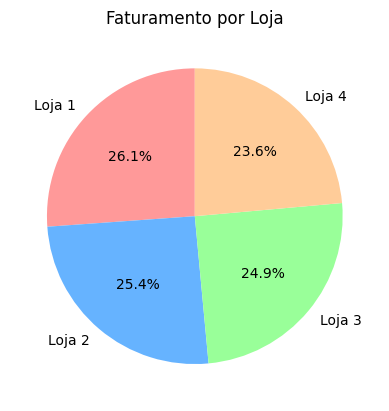

In [ ]:
faturamento = pd.Series(price_array, index=["Loja 1", "Loja 2", "Loja 3", "Loja 4"])
faturamento.plot.pie(
  autopct='%1.1f%%',
  startangle=90,
  colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Faturamento por Loja')

plt.show()

# 2. Vendas por Categoria


In [ ]:
frequencia_categoria = loja["Categoria do Produto"].value_counts()
frequencia2_categoria = loja2["Categoria do Produto"].value_counts()
frequencia3_categoria = loja3["Categoria do Produto"].value_counts()
frequencia4_categoria = loja4["Categoria do Produto"].value_counts()
contagem_frenquencia = pd.concat(
    [frequencia_categoria, frequencia2_categoria, frequencia3_categoria, frequencia4_categoria],
    axis=1
)

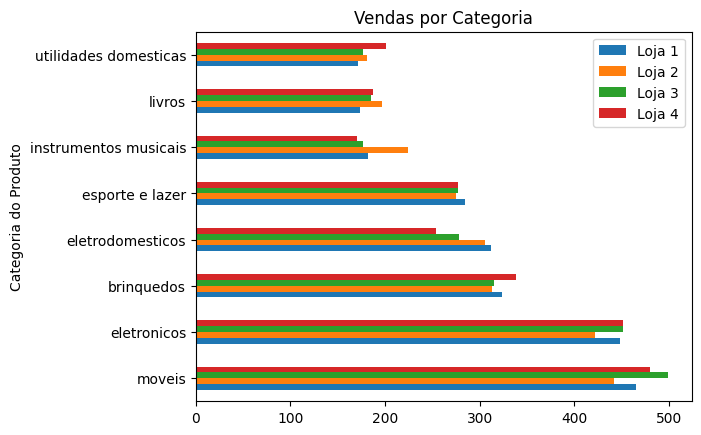

In [ ]:
contagem_frenquencia.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
contagem_frenquencia = contagem_frenquencia.fillna(0).astype(int)

contagem_frenquencia.plot.barh()
plt.title('Vendas por Categoria')
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
def averageRating(array_rating):
  rating_tot = 0
  for rating in array_rating:
    rating_tot += rating
  return rating_tot / len(array_rating)

rating_sum =  round(averageRating(loja["Avaliação da compra"]), 2)
rating_sum2 = round(averageRating(loja2["Avaliação da compra"]), 2)
rating_sum3 = round(averageRating(loja3["Avaliação da compra"]), 2)
rating_sum4 = round(averageRating(loja4["Avaliação da compra"]), 2)

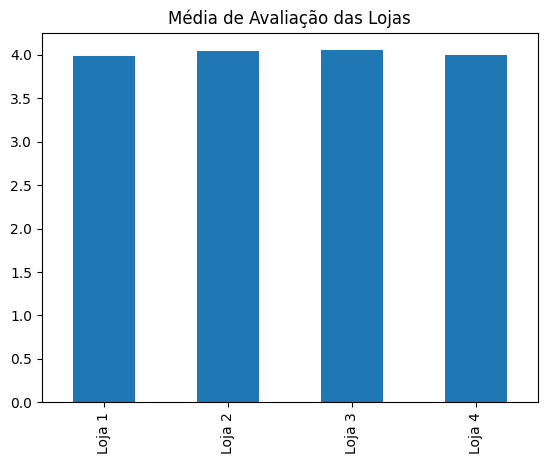

In [ ]:
rating_array = [rating_sum, rating_sum2, rating_sum3, rating_sum4]
rating = pd.Series(rating_array, index=["Loja 1", "Loja 2", "Loja 3", "Loja 4"])
rating.plot.bar()
plt.title('Média de Avaliação das Lojas')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
def lowest_selling_product_comparator(product_array):
  bestselling_group_length = (round((len(product_array))/10))*(-1)

  return product_array[bestselling_group_length:]

def bestselling_product_comparator(product_array):
  lowest_selling_group_length = round((len(product_array))/10)

  return product_array[:lowest_selling_group_length]

product_sold = loja["Produto"].value_counts()
product_sold2 = loja2["Produto"].value_counts()
product_sold3 = loja3["Produto"].value_counts()
product_sold4 = loja4["Produto"].value_counts()


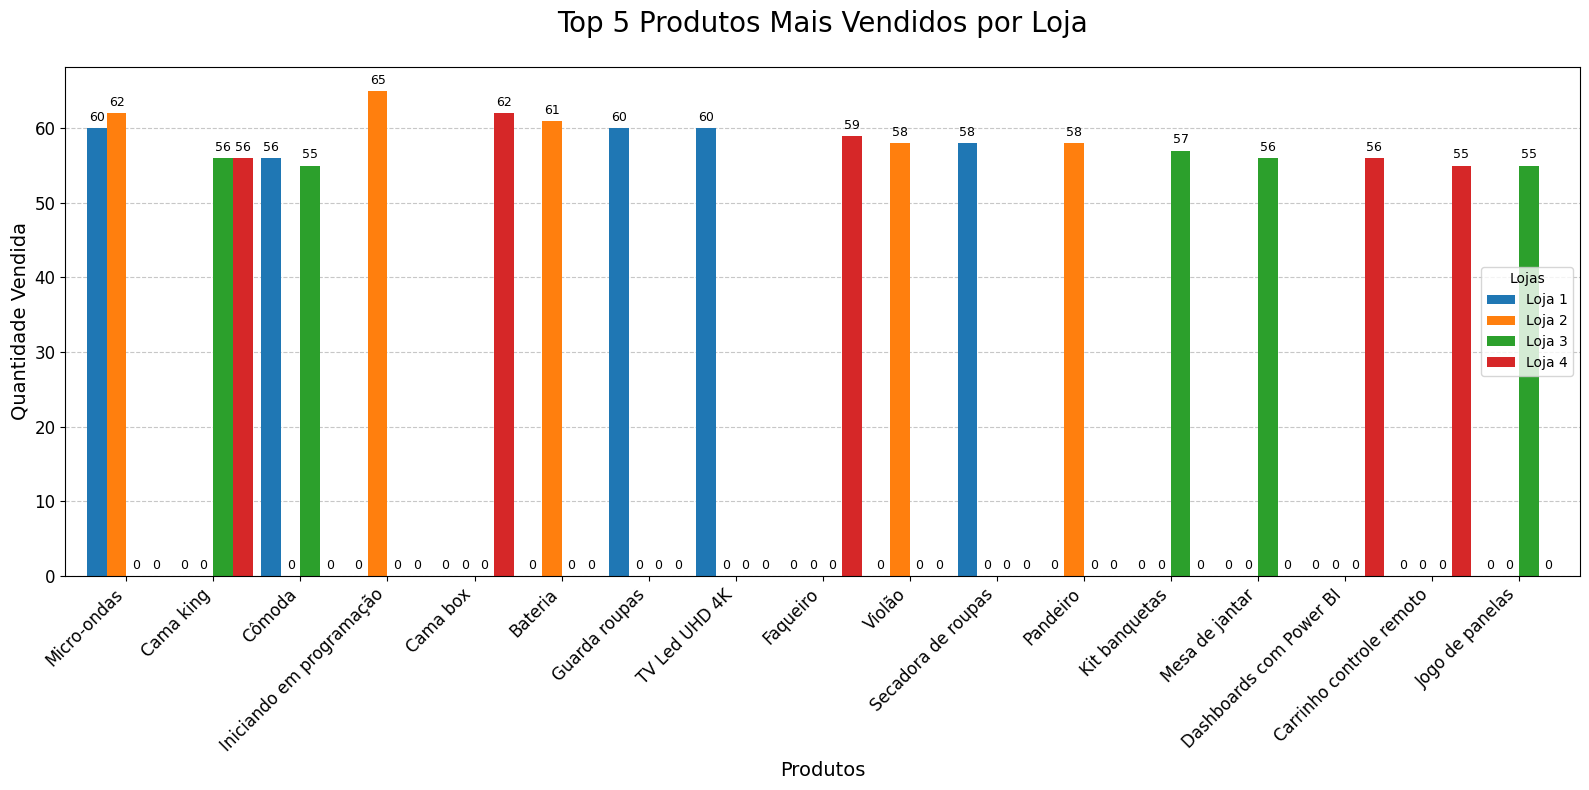

In [ ]:
bestselling_products_list = {
    'Loja 1': bestselling_product_comparator(product_sold),
    'Loja 2': bestselling_product_comparator(product_sold2),
    'Loja 3': bestselling_product_comparator(product_sold3),
    'Loja 4': bestselling_product_comparator(product_sold4)
}

len_bestselling_products = len(bestselling_products_list['Loja 1'])
bestselling_products = pd.DataFrame(bestselling_products_list)

bestselling_products['Total'] = bestselling_products.sum(axis=1)
bestselling_products = bestselling_products.sort_values(by='Total', ascending=False)
del bestselling_products['Total']

ax = bestselling_products.plot.bar(
    figsize=(16, 8),
    width= 0.9
)
ax.set_title(f'Top {len_bestselling_products} Produtos Mais Vendidos por Loja', fontsize=20, pad=25)
ax.set_ylabel('Quantidade Vendida', fontsize=14)
ax.set_xlabel('Produtos', fontsize=14)

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

ax.legend(title='Lojas')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

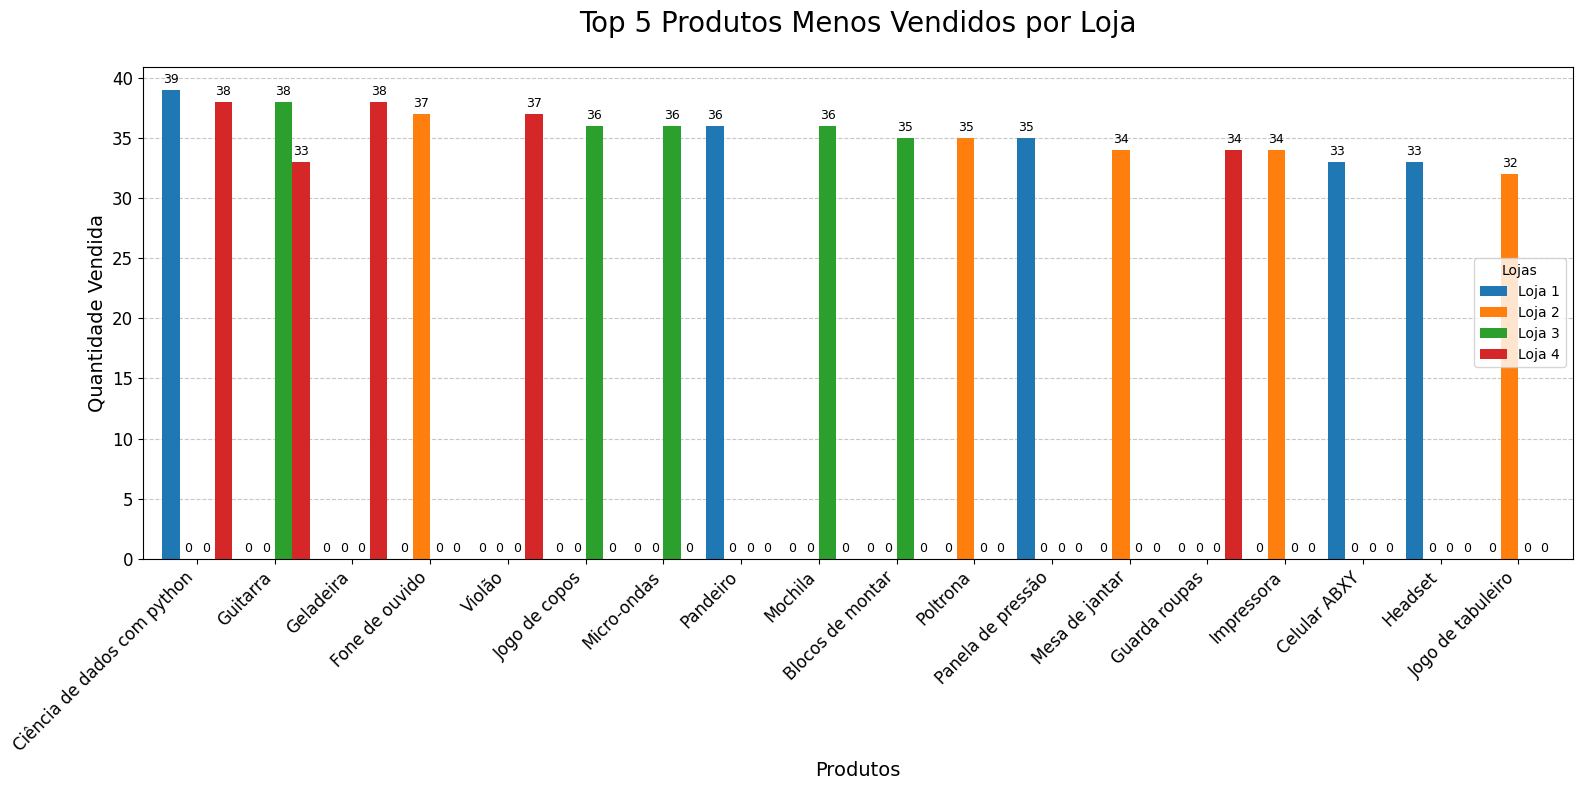

In [ ]:
lowest_selling_products_list = {
    'Loja 1': lowest_selling_product_comparator(product_sold),
    'Loja 2': lowest_selling_product_comparator(product_sold2),
    'Loja 3': lowest_selling_product_comparator(product_sold3),
    'Loja 4': lowest_selling_product_comparator(product_sold4)
}

len_lowest_selling_products = len(lowest_selling_products_list['Loja 1'])
lowest_selling_products = pd.DataFrame(lowest_selling_products_list)

lowest_selling_products['Total'] = lowest_selling_products.sum(axis=1)
lowest_selling_products = lowest_selling_products.sort_values(by='Total', ascending=False)
del lowest_selling_products['Total']

ax = lowest_selling_products.plot.bar(
    figsize=(16, 8),
    width= 0.9
)
ax.set_title(f'Top {len_lowest_selling_products} Produtos Menos Vendidos por Loja', fontsize=20, pad=25)
ax.set_ylabel('Quantidade Vendida', fontsize=14)
ax.set_xlabel('Produtos', fontsize=14)

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

ax.legend(title='Lojas')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
def shiping_average(array_shiping):
  shiping_tot = 0
  for shiping in array_shiping:
    shiping_tot += shiping
  return shiping_tot / len(array_shiping)

shiping_sum = round(shiping_average(loja["Frete"]), 5)
shiping_sum2 = round(shiping_average(loja2["Frete"]), 5)
shiping_sum3 = round(shiping_average(loja3["Frete"]), 5)
shiping_sum4 = round(shiping_average(loja4["Frete"]), 5)

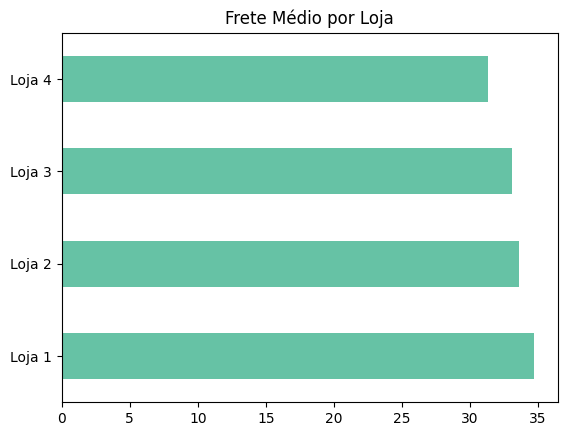

In [ ]:
shiping_array = [shiping_sum, shiping_sum2, shiping_sum3, shiping_sum4]
shiping = pd.Series(shiping_array, index=["Loja 1", "Loja 2", "Loja 3", "Loja 4"])
shiping.plot.barh(
    colormap='Set2'
)
plt.title('Frete Médio por Loja')
plt.show()